## 2002年 强弩之末

- 1.中长期利率周期来看，2002年的利率处于一个低水平态势
- 2.整年来是V形轨迹


In [1]:
#wind接口
from WindPy import w
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
#导入package
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [7]:
## 数据读取
wdata_edb_2002_2010 = w.edb("S0059749", "2002-01-04", "2010-12-31","Fill=Previous")
wdata_edb_2002 = w.edb("S0059749", "2002-01-04", "2002-12-31","Fill=Previous")

##数据处理
if wdata_edb_2002_2010.ErrorCode == 0: # type: ignore
    wdf_edb_2002_2010 = pd.DataFrame(wdata_edb_2002_2010.Data, index=['中债10年期国债到期收益率'], columns=wdata_edb_2002_2010.Times).T
    wdf_edb_2002 = pd.DataFrame(wdata_edb_2002.Data, index=['中债10年期国债到期收益率'], columns=wdata_edb_2002.Times).T
    print(wdf_edb_2002_2010.head(2),'\n', wdf_edb_2002.head(2))
else:
  print("Error Code:", wdata_edb.ErrorCode) # type: ignore
  print("Error Message:", wdf_edb_2002_2010.Data[0][0])


            中债10年期国债到期收益率
2002-01-04         3.2096
2002-01-07         3.2003 
             中债10年期国债到期收益率
2002-01-04         3.2096
2002-01-07         3.2003


In [12]:
wdf_edb_2002_2010[wdf_edb_2002_2010.中债10年期国债到期收益率==max(wdf_edb_2002_2010.中债10年期国债到期收益率)].index.tolist()

[datetime.date(2004, 12, 6)]

<function matplotlib.pyplot.show(close=None, block=None)>

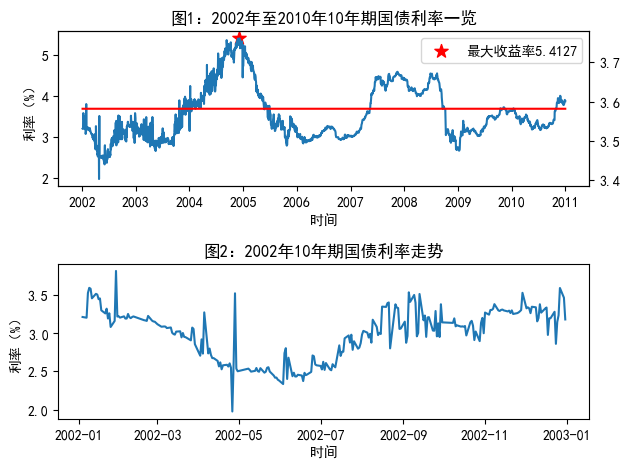

In [28]:
## 画图
# plt.figure(figsize=(16,12)) 画布大小
fig, ax = plt.subplots(2,1)
ax[0].plot(wdf_edb_2002_2010.index, wdf_edb_2002_2010.中债10年期国债到期收益率)
ax[0].twinx().plot(wdf_edb_2002_2010.index,[wdf_edb_2002_2010.中债10年期国债到期收益率.mean()]*wdf_edb_2002_2010.shape[0],c='r')
ax[0].set_title('图1：2002年至2010年10年期国债利率一览')
ax[0].set_xlabel('时间')
ax[0].set_ylabel('利率（%）')
ax[0].scatter(wdf_edb_2002_2010[wdf_edb_2002_2010.中债10年期国债到期收益率==max(wdf_edb_2002_2010.中债10年期国债到期收益率)].index.tolist(),
            max(wdf_edb_2002_2010.中债10年期国债到期收益率), marker='*', color='r', s=100,
            label='最大收益率{}'.format(max(wdf_edb_2002_2010.中债10年期国债到期收益率)))
ax[0].legend(loc='best')

ax[1].plot(wdf_edb_2002.index, wdf_edb_2002.中债10年期国债到期收益率)
ax[1].set_title('图2：2002年10年期国债利率走势')
ax[1].set_xlabel('时间')
ax[1].set_ylabel('利率（%）')

plt.tight_layout() #自动调整子图之间重叠
plt.show


## 2002年 强弩之末

- 1.中长期利率周期来看，2002年的利率处于一个低水平态势，与宏观经济基本因素决定，当年CPI高位运行
- 2.整年来是V形轨迹，最低在2.4%（6月上旬），最高3.5%（开年），四季度波动较大
